In [110]:
!pip install pomegranate

Defaulting to user installation because normal site-packages is not writeable


# Importing the necessary libraries

In [111]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os
import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import RobustScaler
import plotly.express as px

In [112]:
pip install --user bnlearn

Note: you may need to restart the kernel to use updated packages.


# Inserting the dataset

In [236]:
heartdf=pd.read_csv('heart.csv')

In [237]:
heartdf

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

# Head of the dataset

In [238]:
print(heartdf)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

# Plot histograms for each variable

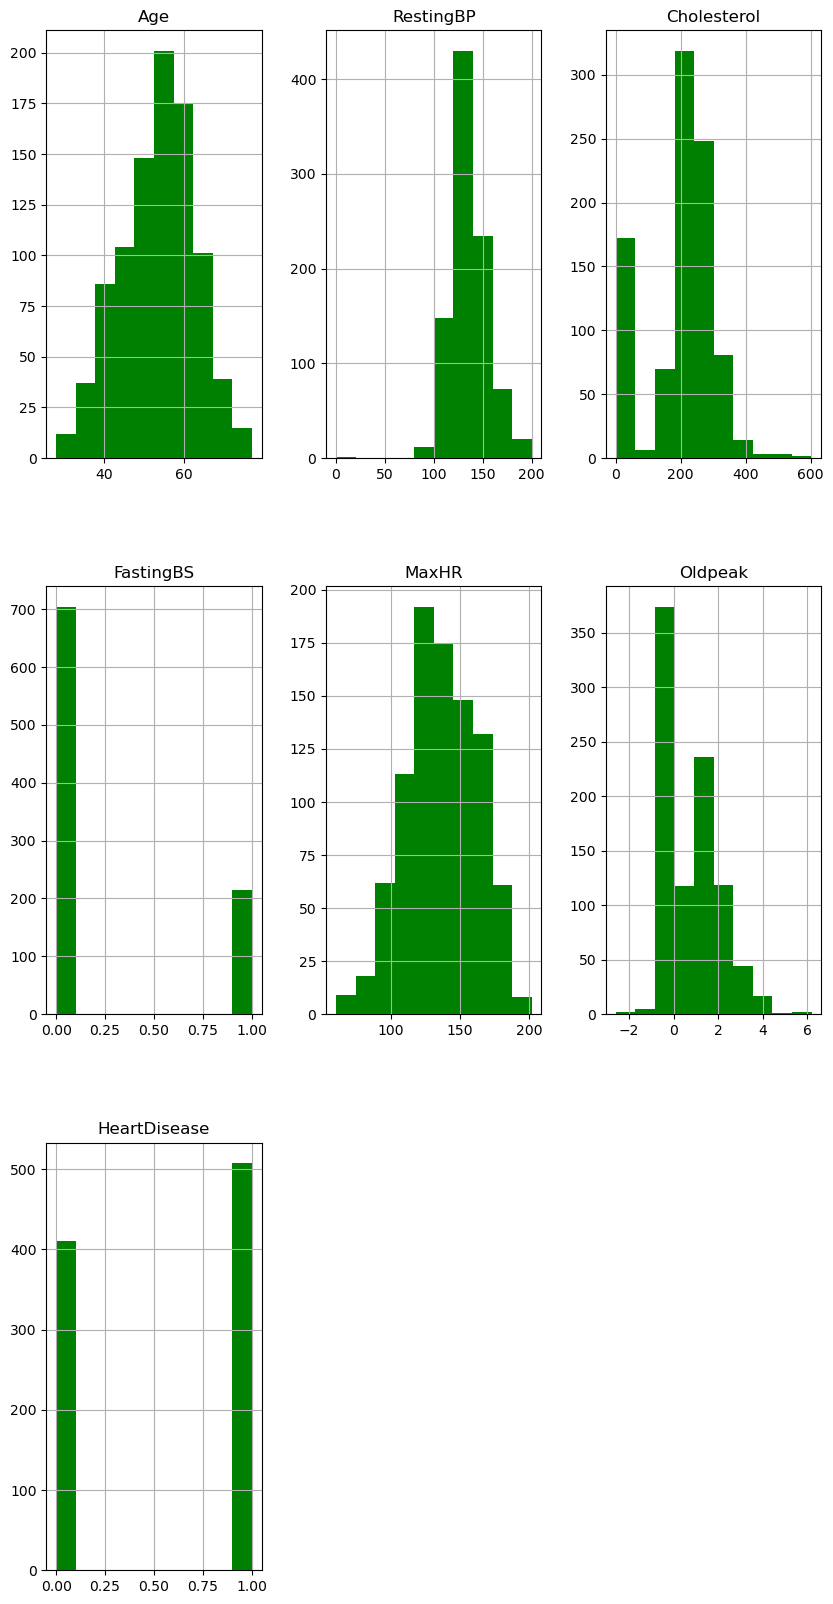

In [282]:

heartdf.hist(color = "green",figsize = (10, 20))
plt.show()

# Checking the dataset shape (Rows,columns)


In [283]:
print('Display the Number of rows are',heartdf.shape[0], 'and number of columns are ',heartdf.shape[1])

Display the Number of rows are 918 and number of columns are  12


In [241]:
heartdf.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# Show the data type of the dataframe

In [278]:
print(heartdf.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [242]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [243]:
heartdf.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Print the data characteristics, usings pandas built-in describe() function

In [244]:
heartdf.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

# Display the no of  categorical variables

In [245]:
categorical = [var for var in heartdf.columns if heartdf[var].dtype=='O']

print('Within the dataset present {} categorical variables\n'.format(len(categorical)))

print('show the categorical variables into the dataset :\n\n', categorical)

Within the dataset present 5 categorical variables

show the categorical variables into the dataset :

 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [247]:
heartdf[categorical].head()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

In [248]:
print("Null values :: ")
heartdf[categorical].isnull().sum()

Null values :: 


Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [249]:
heartdf.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [250]:
for i in heartdf.columns:
    print(i)
    print(heartdf[i].value_counts())
    print("Show the age into the heart dataset")

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
Show the age into the heart dataset
Sex
M    725
F    193
Name: Sex, dtype: int64
Show the age into the heart dataset
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Show the age into the heart dataset
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
Show the age into the heart dataset
Cholesterol
0      172
254     11
223     10
220     10
230      9


In [251]:
heartdf.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Checking for duplicate rows

In [254]:
heartdf[heartdf.duplicated()]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

# Removing the duplicates

In [253]:
heartdf.drop_duplicates(keep='first',inplace=True)

<AxesSubplot:>

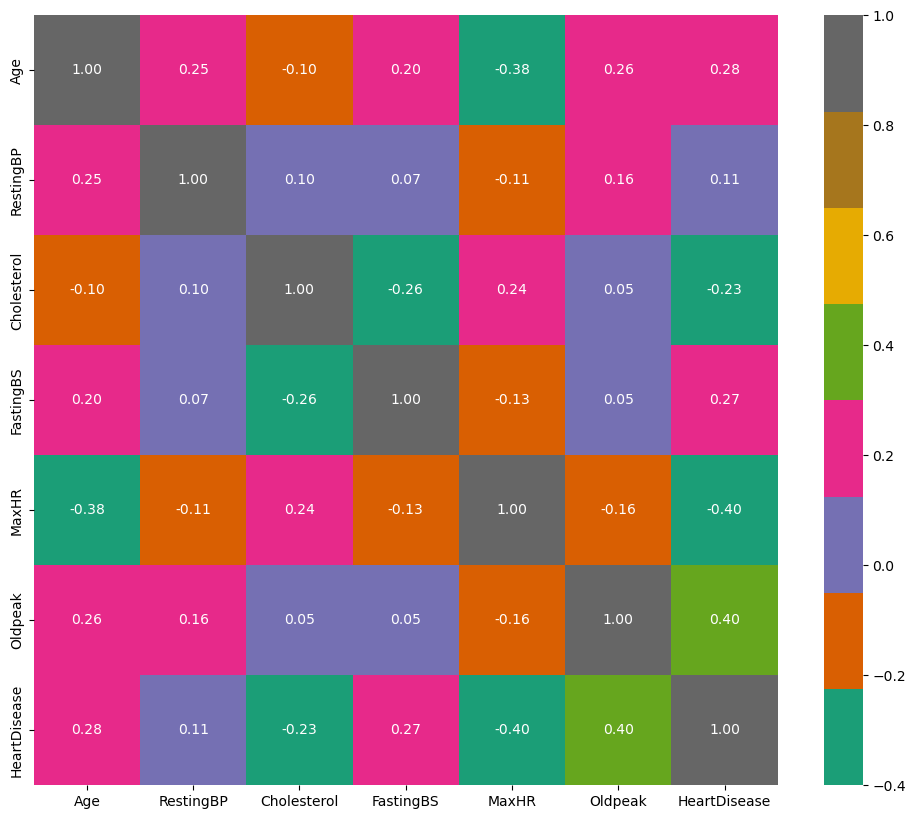

In [128]:
plt.figure(figsize=(12,10))
sns.heatmap(heartdf.corr(),annot=True,cmap="Dark2",fmt='.2f')

# get the last n rows

In [131]:
heartdf.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

# Checking statistical data

In [132]:
heartdf.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

# Computing the correlation matrix

In [255]:
heartdf.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

# Scaling Data

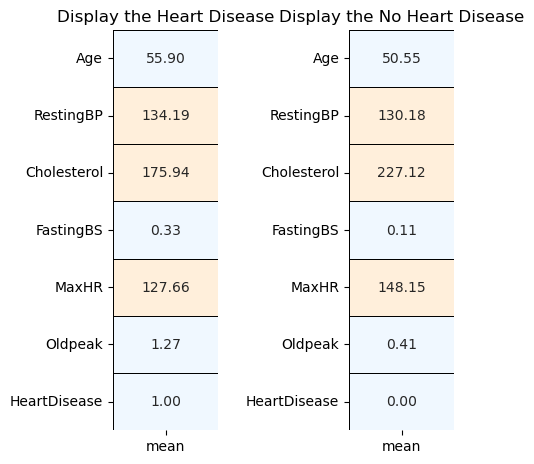

In [133]:
yes = heartdf[heartdf['HeartDisease'] == 1].describe().T
no = heartdf[heartdf['HeartDisease'] == 0].describe().T
colors = ['#F0F8FF','#FFEFDB']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Display the Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Display the No Heart Disease');

fig.tight_layout(pad = 2)

# Feature scalling 


In [164]:
from sklearn import preprocessing

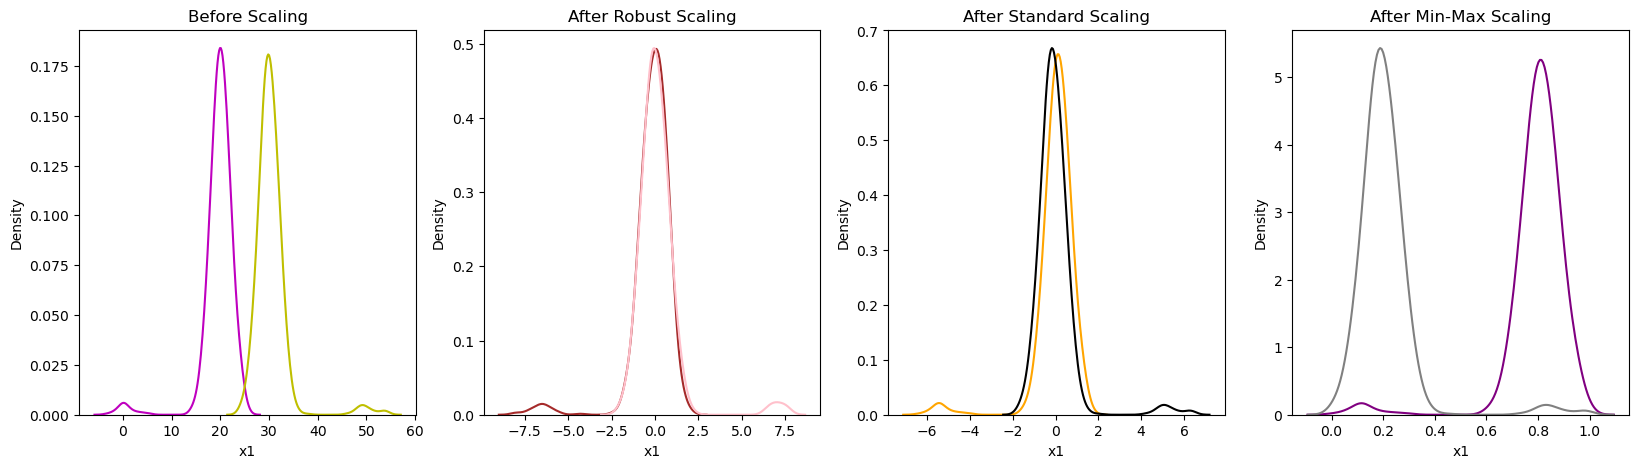

In [189]:

x = pd.DataFrame({

    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),

    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
heartdf = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='m')
sns.kdeplot(x['x2'], ax = ax1, color ='y')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='brown')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='pink')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='orange')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='k')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='purple')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='gray')
plt.show()

In [134]:

numerical= heartdf.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = heartdf.select_dtypes('object').columns

print(f'Numerical Columns:  {heartdf[numerical].columns}')
print(f'Categorical Columns: {heartdf[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df= heartdf.copy(deep = True)

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df.sample(10)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
36    65    1              0        140          306          1           1   
913   45    1              3        110          264          0           1   
76    32    1              0        118          529          0           1   
99    41    1              1        125          269          0           1   
334   51    1              0        130            0          1           1   
623   60    1              0        140          293          0           0   
475   59    1              0        178            0          1           0   
791   51    1              0        140          298          0           1   
536   62    1              2        133            0          1           2   
822   58    1              2        105          240          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
36      87               1      1.5         1             1  
913    132               0      1.2         1             1  
76     130               0      0.0         1             1  
99     144               0      0.0         2             0  
334    170               0     -0.7         2             1  
623    170               0      1.2         1             1  
475    120               1      0.0         1             1  
791    122               1      4.2         1             1  
536    119               1      1.2         1             1  
822    154               1      0.6         1             0

In [136]:
col = list(heartdf.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(heartdf[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [137]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df['Age'] = ss.fit_transform(df1[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])

In [138]:
df.sample(7)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
160  0.582246    1              0   0.410909     0.596393          1   
490  1.961193    1              2  -0.669935     0.139040          0   
600  0.370100    1              0  -0.129513     0.075010          0   
787  1.430829    1              0  -1.750778     0.916541          0   
696 -1.963504    1              0  -0.669935    -0.007314          0   
861  1.218683    1              0  -1.210356     0.450040          0   
108 -0.372411    1              0   0.410909    -0.638462          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
160           0 -0.699876               1  0.295455         1             1  
490           1 -1.367945               1  0.409091         1             1  
600           2 -1.603734               1  0.409091         1             0  
787           0 -0.464087               1  0.397727         1             1  
696           1 -0.267596               1  0.477273         1             1  
861           0  0.832754               0  0.363636         2             1  
108           1 -0.071105               0  0.295455         2             0

#  Gaussian Process regression

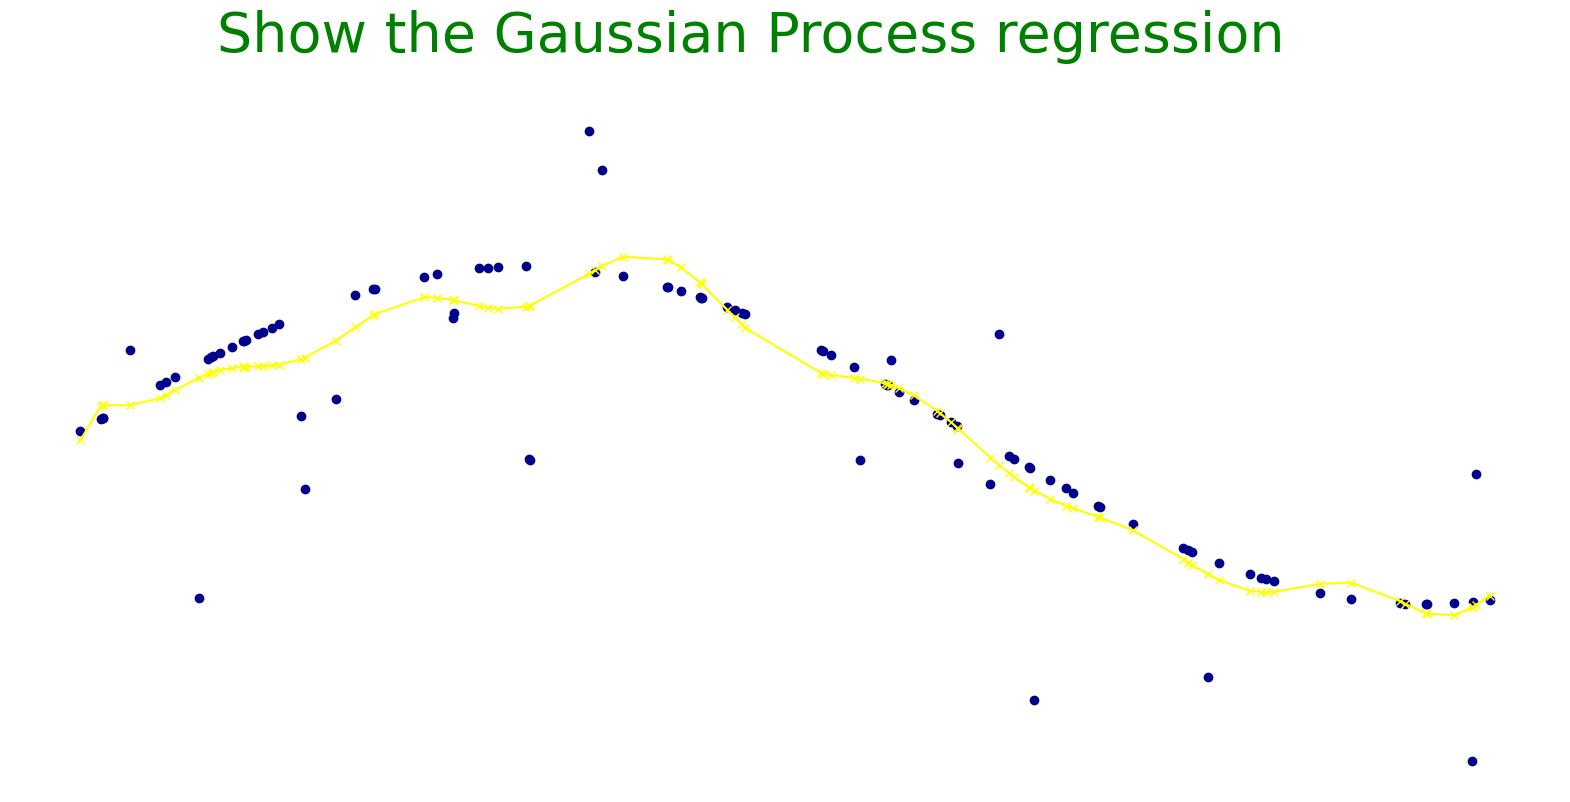

In [225]:
import numpy as np
rng = np.random.RandomState(0)
import matplotlib.pyplot as plt


def wave(n_points=100, n_points_perturbed=20, pertubation_mult=1):
    X = 5 * rng.rand(n_points, 1)
    y = np.sin(X).ravel()
    perturbation_step_size = n_points // n_points_perturbed
    y[::perturbation_step_size] += 3 * pertubation_mult * (0.5 - rng.rand(X.shape[0] // perturbation_step_size))
    

    sort = np.argsort(X[:, 0])
    X = X[sort]
    y = y[sort]
    
    return X, y


X, y = wave(n_points=100, n_points_perturbed=20, pertubation_mult=1)

from sklearn.gaussian_process import GaussianProcessRegressor
clf = GaussianProcessRegressor(random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X)

fig, ax = plt.subplots(1, figsize=(20, 9))
plt.plot(X[:, 0], y, marker='o', color='darkblue', linewidth=0)
plt.plot(X[:, 0], y_pred, marker='x', color='yellow')
plt.suptitle("Show the Gaussian Process regression ", color='green',fontsize=40)
plt.axis('off')
pass

# Split the dataset

In [139]:
features = df[df.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [140]:
x_train

array([[-0.37241067,  0.        ,  0.        , ...,  0.        ,
         0.29545455,  1.        ],
       [-2.06957728,  1.        ,  1.        , ...,  0.        ,
         0.29545455,  2.        ],
       [ 0.79439137,  1.        ,  0.        , ...,  1.        ,
         0.48863636,  1.        ],
       ...,
       [-0.26633776,  1.        ,  2.        , ...,  1.        ,
         0.48863636,  1.        ],
       [ 0.79439137,  1.        ,  1.        , ...,  0.        ,
         0.32954545,  2.        ],
       [ 0.47617263,  1.        ,  0.        , ...,  0.        ,
         0.29545455,  2.        ]])

In [141]:
 x_test

array([[-0.16026485,  1.        ,  2.        , ...,  0.        ,
         0.63636364,  2.        ],
       [-1.11492106,  1.        ,  0.        , ...,  1.        ,
         0.52272727,  1.        ],
       [ 1.85512049,  1.        ,  0.        , ...,  1.        ,
         0.29545455,  1.        ],
       ...,
       [ 1.00653719,  1.        ,  0.        , ...,  0.        ,
         0.45454545,  1.        ],
       [ 0.79439137,  1.        ,  0.        , ...,  0.        ,
         0.57954545,  1.        ],
       [ 0.37009972,  0.        ,  0.        , ...,  1.        ,
         0.36363636,  2.        ]])

#  Gaussian Process classifier

In [142]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [143]:
y_pred = gnb.predict(x_test)

y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [276]:
from sklearn.metrics import accuracy_score


In [277]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Process classifier is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Process classifier is :  85.86956521739131 %


In [145]:
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8583
Test set score: 0.8587


In [146]:
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [147]:



from matplotlib import cm

In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.84      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [224]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8575
